## Data Source

This dataset has around 36,600 observations in it with 16 columns and it is a mix between categorical and numeric values.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

## Reading Data

In [2]:
airbnb=pd.read_csv("AirbnbListing.csv", encoding= 'unicode_escape')
airbnb.head()

,ï»¿id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12351.0,Sydney City & Harbour at the door,17061.0,Stuart,City of Sydney,Sydney,-33.865153,151.191896,Private room,100,2.0,493.0,21/11/2018,4.83,2.0,187.0
1,14250.0,Manly Harbour House,55948.0,Heidi,Northern Beaches,Manly,-33.800929,151.261722,Entire home/apt,471,5.0,1.0,2/01/2016,0.03,2.0,321.0
2,15253.0,Stunning Penthouse Apartment In Heart Of The City,59850.0,Morag,City of Sydney,Sydney,-33.880455,151.216541,Private room,109,2.0,300.0,16/11/2018,3.63,2.0,316.0
3,20865.0,3 BED HOUSE + 1 BED STUDIO Balmain,64282.0,Fiona,Inner West,Leichhardt,-33.859072,151.172753,Entire home/apt,450,7.0,15.0,7/01/2018,0.18,1.0,69.0
4,26174.0,"COZY PRIVATE ROOM, GREAT LOCATION!",110561.0,Amanda,Eastern Suburbs,Woollahra,-33.889087,151.259404,Private room,62,1.0,42.0,23/11/2018,0.45,1.0,140.0


In [3]:
# number of rows
len(airbnb)

36663

In [4]:
#checking type of every column in the dataset
airbnb.dtypes

ï»¿id                             float64
name                               object
host_id                           float64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                    float64
number_of_reviews                 float64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
dtype: object

## Understadning, Wrangling and Cleaning Data¶

Finding null values in data:

In [5]:
airbnb.isnull().sum()

ï»¿id                                 1
name                                 13
host_id                               1
host_name                             7
neighbourhood_group                   1
neighbourhood                         1
latitude                              1
longitude                             1
room_type                             1
price                                 0
minimum_nights                        1
number_of_reviews                     1
last_review                       11938
reviews_per_month                 11938
calculated_host_listings_count        1
availability_365                      1
dtype: int64

#### Privacy Act

In [6]:
# According to Australian Government Privacy Act 1988 No. 119, 1988 
# I should drop columns that are not significant or could be unethical 
# to use for our future data exploration and predictions
airbnb.drop(['host_name','last_review'], axis=1, inplace=True)
airbnb.head()

,ï»¿id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,12351.0,Sydney City & Harbour at the door,17061.0,City of Sydney,Sydney,-33.865153,151.191896,Private room,100,2.0,493.0,4.83,2.0,187.0
1,14250.0,Manly Harbour House,55948.0,Northern Beaches,Manly,-33.800929,151.261722,Entire home/apt,471,5.0,1.0,0.03,2.0,321.0
2,15253.0,Stunning Penthouse Apartment In Heart Of The City,59850.0,City of Sydney,Sydney,-33.880455,151.216541,Private room,109,2.0,300.0,3.63,2.0,316.0
3,20865.0,3 BED HOUSE + 1 BED STUDIO Balmain,64282.0,Inner West,Leichhardt,-33.859072,151.172753,Entire home/apt,450,7.0,15.0,0.18,1.0,69.0
4,26174.0,"COZY PRIVATE ROOM, GREAT LOCATION!",110561.0,Eastern Suburbs,Woollahra,-33.889087,151.259404,Private room,62,1.0,42.0,0.45,1.0,140.0


In [7]:
# filling all NaN values in 'reviews_per_month' with 0
airbnb.fillna({'reviews_per_month':0}, inplace=True)
airbnb.fillna({'name':0}, inplace=True)

In [8]:
# Check again num of null values
airbnb.isnull().sum()

ï»¿id                             1
name                              0
host_id                           1
neighbourhood_group               1
neighbourhood                     1
latitude                          1
longitude                         1
room_type                         1
price                             0
minimum_nights                    1
number_of_reviews                 1
reviews_per_month                 0
calculated_host_listings_count    1
availability_365                  1
dtype: int64

In [9]:
# list of neighbourhoods in Sydney Airbnb
airbnb.neighbourhood_group.unique()

array(['City of Sydney', 'Northern Beaches', 'Inner West',
       'Eastern Suburbs', 'Lower North Shore', 'Hills District',
       'Southern Sydney', 'Upper North Shore', 'Canterbury-Bankstown',
       '(Greater) Western Sydney', 'South-Eastern Sydney', 'Macarthur',
       nan], dtype=object)

In [10]:
len(airbnb.neighbourhood.unique())

39

In [11]:
# Type of property in Sydney
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', nan],
      dtype=object)

## Exploring and Visualizing Data

In [12]:
# finding most listing hosts
top_host=airbnb.host_id.value_counts().head(5)
top_host

36410227.0    197
7409213.0     176
15739069.0    166
15469257.0    118
16357713.0    103
Name: host_id, dtype: int64

In [13]:
#check above num with max in "calculated_host_listings_count" column
top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check

197.0

[Text(0, 0, '7409213.0'),
 Text(0, 0, '15469257.0'),
 Text(0, 0, '15739069.0'),
 Text(0, 0, '16357713.0'),
 Text(0, 0, '36410227.0')]

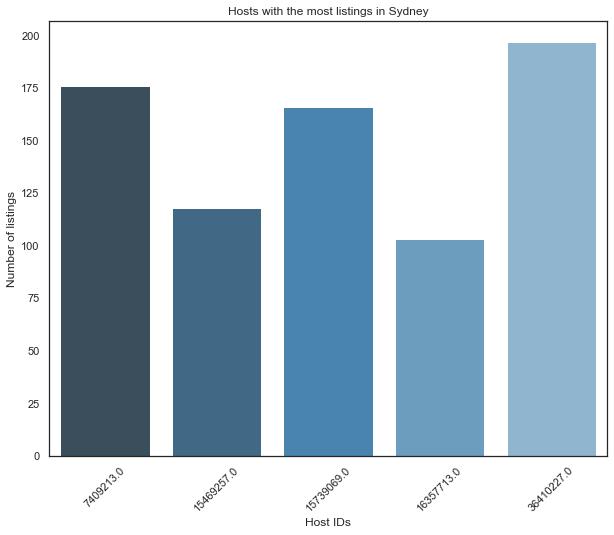

In [14]:
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in Sydney')
viz_1.set_ylabel('Number of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [15]:
#City of Sydney
sub_1=airbnb.loc[airbnb['neighbourhood_group'] == 'City of Sydney']
price_sub1=sub_1[['price']]
#Northern Beaches
sub_2=airbnb.loc[airbnb['neighbourhood_group'] == 'Northern Beaches']
price_sub2=sub_2[['price']]
#Inner West
sub_3=airbnb.loc[airbnb['neighbourhood_group'] == 'Inner West']
price_sub3=sub_3[['price']]
#Eastern Suburbs
sub_4=airbnb.loc[airbnb['neighbourhood_group'] == 'Eastern Suburbs']
price_sub4=sub_4[['price']]
#Lower North Shore
sub_5=airbnb.loc[airbnb['neighbourhood_group'] == 'Lower North Shore']
price_sub5=sub_5[['price']]
#Hills District
sub_6=airbnb.loc[airbnb['neighbourhood_group'] == 'Hills District']
price_sub6=sub_6[['price']]
#Southern Sydney
sub_7=airbnb.loc[airbnb['neighbourhood_group'] == 'Southern Sydney']
price_sub7=sub_7[['price']]
#Upper North Shore
sub_8=airbnb.loc[airbnb['neighbourhood_group'] == 'Upper North Shore']
price_sub8=sub_8[['price']]
#Canterbury-Bankstown
sub_9=airbnb.loc[airbnb['neighbourhood_group'] == 'Canterbury-Bankstown']
price_sub9=sub_9[['price']]
#(Greater) Western Sydney
sub_10=airbnb.loc[airbnb['neighbourhood_group'] == '(Greater) Western Sydney']
price_sub10=sub_10[['price']]
#South-Eastern Sydney
sub_11=airbnb.loc[airbnb['neighbourhood_group'] == 'South-Eastern Sydney']
price_sub11=sub_11[['price']]
#Macarthur
sub_12=airbnb.loc[airbnb['neighbourhood_group'] == 'Macarthur']
price_sub12=sub_12[['price']]

price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5,price_sub6, price_sub7, price_sub8, price_sub9, price_sub10,price_sub11, price_sub12]

In [16]:
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['City of Sydney', 'Northern Beaches', 'Inner West',
       'Eastern Suburbs', 'Lower North Shore', 'Hills District',
       'Southern Sydney', 'Upper North Shore', 'Canterbury-Bankstown',
       '(Greater) Western Sydney', 'South-Eastern Sydney', 'Macarthur']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
p_l_b_n_2[5].rename(columns={'price':nei_list[5]}, inplace=True)
p_l_b_n_2[6].rename(columns={'price':nei_list[6]}, inplace=True)
p_l_b_n_2[7].rename(columns={'price':nei_list[7]}, inplace=True)
p_l_b_n_2[8].rename(columns={'price':nei_list[8]}, inplace=True)
p_l_b_n_2[9].rename(columns={'price':nei_list[9]}, inplace=True)
p_l_b_n_2[10].rename(columns={'price':nei_list[10]}, inplace=True)
p_l_b_n_2[11].rename(columns={'price':nei_list[11]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,City of Sydney,Northern Beaches,Inner West,Eastern Suburbs,Lower North Shore,Hills District,Southern Sydney,Upper North Shore,Canterbury-Bankstown,(Greater) Western Sydney,South-Eastern Sydney,Macarthur
Stats,,,,,,,,,,,,
min,0.0,0.0,0.0,0.0,19.0,19.0,0.0,0.0,12.0,14.0,28.0,28.0
25%,89.0,115.0,65.0,82.0,90.0,55.0,60.0,71.0,49.0,50.0,60.0,50.0
50%,138.0,199.0,100.0,150.0,145.0,89.0,100.0,109.0,75.0,89.0,82.0,84.0
75%,199.0,400.0,179.0,251.0,251.0,150.0,165.0,180.0,120.0,150.0,136.0,182.0
max,14999.0,6922.0,9020.0,12000.0,13000.0,3500.0,1200.0,850.0,2500.0,3000.0,975.0,1944.0


Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

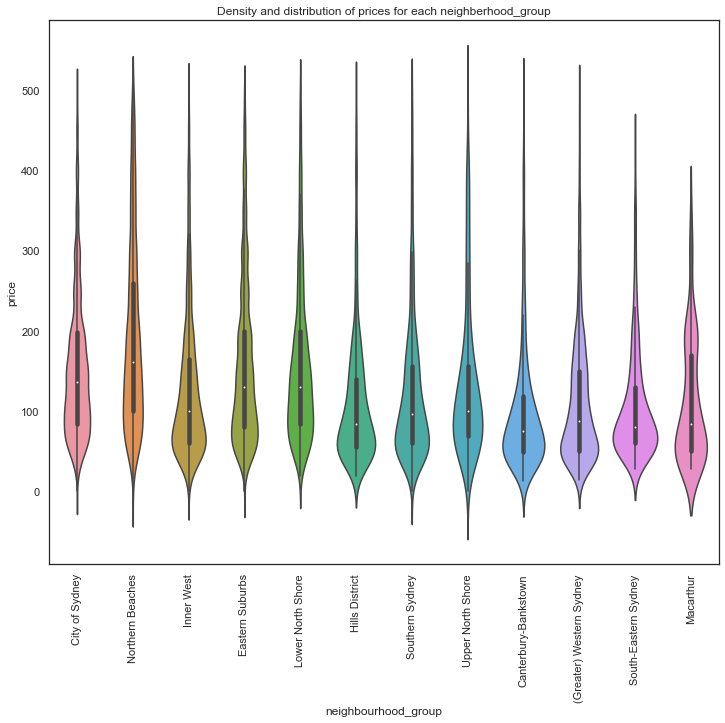

In [17]:
sub_13=airbnb[airbnb.price < 500]
fig_dims = (12, 10)
fig, ax = plt.subplots(figsize=fig_dims)
#using violinplot to showcase density and distribtuion of prices 
viz=sns.violinplot(data=sub_13, x='neighbourhood_group', y='price', ax=ax)
viz.set_xticklabels(viz.get_xticklabels(), rotation=90)
viz.set_title('Density and distribution of prices for each neighberhood_group')

## EDA-Exploratory Data Analysis

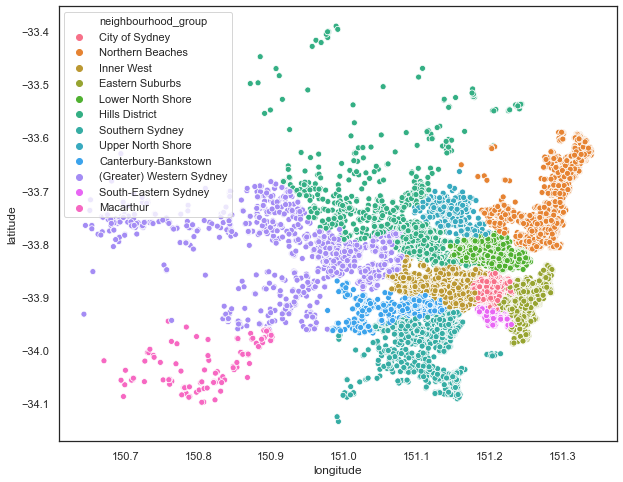

In [18]:
# Hostd Density in Sydney Suburbs
plt.figure(figsize=(10,8))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)
plt.ioff()

In [19]:
#Plotting scatter plot for different suburb in Sydney
import folium
from folium.plugins import HeatMap
m=folium.Map([-33.8528,151.0060],zoom_start=10.5)
HeatMap(airbnb[['latitude','longitude']].dropna(),radius=9,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

In [20]:
#finding out top 10 Suburb

airbnb.neighbourhood.value_counts().head(10)

Sydney          9241
Waverley        5467
Randwick        3346
Manly           1800
Warringah       1794
Woollahra       1573
North Sydney    1370
Marrickville    1252
Pittwater       1192
Leichhardt       999
Name: neighbourhood, dtype: int64

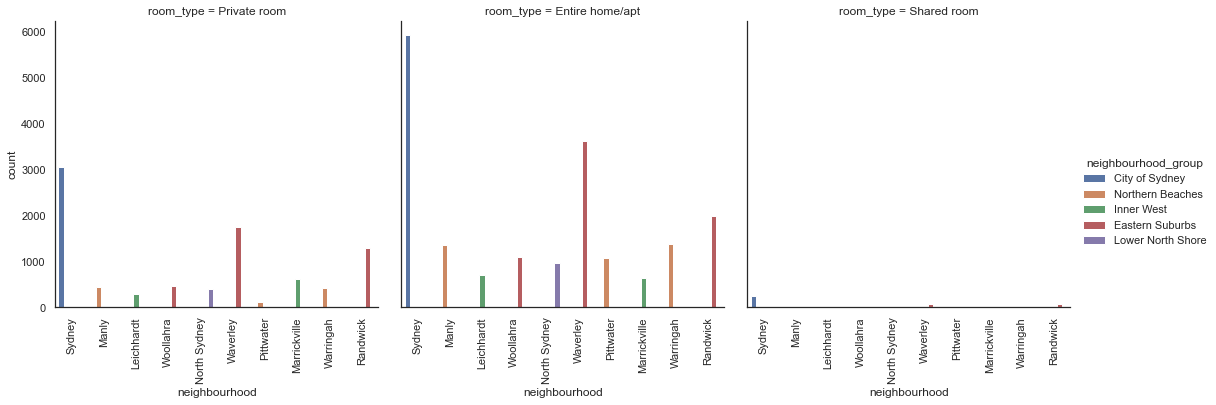

In [21]:
#grabbing top 10 neighbourhoods for sub-dataframe
sub_14=airbnb.loc[airbnb['neighbourhood'].isin(['Sydney','Waverley','Randwick','Manly',
                 'Warringah','Woollahra','North Sydney','Marrickville','Pittwater','Leichhardt'])]
#using catplot to represent multiple interesting attributes together and a count
viz_2=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_14, kind='count')
viz_2.set_xticklabels(rotation=90)

## Availability of Room

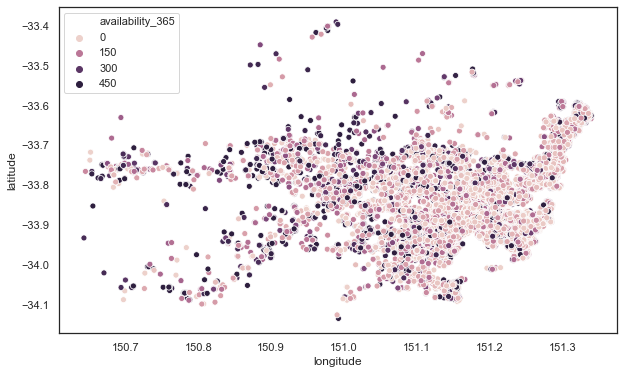

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.availability_365)
plt.ioff()

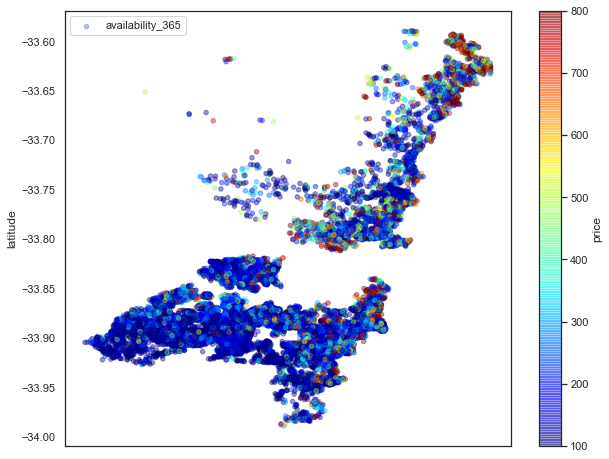

In [23]:
#scatterplot
viz_3=sub_14.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8),vmin=100, vmax=800)
viz_3.legend()

In [24]:
#let's grab 10 most reviewed listings in Sydney Airbnb
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,ï»¿id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,12351.0,Sydney City & Harbour at the door,17061.0,City of Sydney,Sydney,-33.865153,151.191896,Private room,100,2.0,493.0,4.83,2.0,187.0
467,898906.0,Beachside cabin northern beaches,4798499.0,Northern Beaches,Pittwater,-33.621014,151.336106,Entire home/apt,115,1.0,475.0,6.68,1.0,297.0
5256,7944819.0,Close to Airport and CBD with Secure Parking,1553030.0,South-Eastern Sydney,Botany Bay,-33.921516,151.190089,Private room,84,1.0,474.0,12.80,1.0,279.0
144,389876.0,Huge Sydney Apartment + Parking,1943399.0,City of Sydney,Sydney,-33.889261,151.201722,Entire home/apt,136,1.0,443.0,5.46,3.0,208.0
10088,12954762.0,"Near Airport private room, 2 bedroom granny fl...",71193770.0,Southern Sydney,Rockdale,-33.937002,151.152735,Private room,57,1.0,425.0,14.00,2.0,25.0
3786,5751561.0,Private suite in converted church,688781.0,City of Sydney,Sydney,-33.901891,151.181319,Entire home/apt,127,1.0,396.0,9.36,1.0,100.0
79,256569.0,Sandstone Apartment - 350m to Bondi Beach,1347315.0,Eastern Suburbs,Waverley,-33.895861,151.271684,Entire home/apt,136,2.0,392.0,4.59,1.0,108.0
280,725541.0,"City on Your Doorstep from a Vibrant, Elegant ...",1943399.0,City of Sydney,Sydney,-33.892097,151.200071,Entire home/apt,136,1.0,391.0,5.27,3.0,101.0
417,846696.0,Budget studio near local hotspots,4421400.0,City of Sydney,Sydney,-33.879612,151.215928,Entire home/apt,96,3.0,385.0,5.33,8.0,142.0
1273,2239063.0,10 minute walk to the city,3191055.0,City of Sydney,Sydney,-33.873524,151.216849,Private room,105,1.0,370.0,6.30,1.0,250.0


In [25]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 109.2


# Regression Analysis

In [26]:
# preparing the dataset

airbnb.drop(['host_id','latitude','longitude','neighbourhood','number_of_reviews','reviews_per_month','name'], axis=1, inplace=True)
del airbnb['ï»¿id']

In [27]:
airbnb.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,City of Sydney,Private room,100,2.0,2.0,187.0
1,Northern Beaches,Entire home/apt,471,5.0,2.0,321.0
2,City of Sydney,Private room,109,2.0,2.0,316.0
3,Inner West,Entire home/apt,450,7.0,1.0,69.0
4,Eastern Suburbs,Private room,62,1.0,1.0,140.0


In [28]:
#Encode the input Variables
def Encode(airbnb):
    for column in airbnb.columns[airbnb.columns.isin(['neighbourhood_group', 'room_type'])]:
        airbnb[column] = airbnb[column].factorize()[0]
    return airbnb

airbnb_en = Encode(airbnb.copy())
airbnb_en.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,100,2.0,2.0,187.0
1,1,1,471,5.0,2.0,321.0
2,0,0,109,2.0,2.0,316.0
3,2,1,450,7.0,1.0,69.0
4,3,0,62,1.0,1.0,140.0


Index(['neighbourhood_group', 'room_type', 'price', 'minimum_nights',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

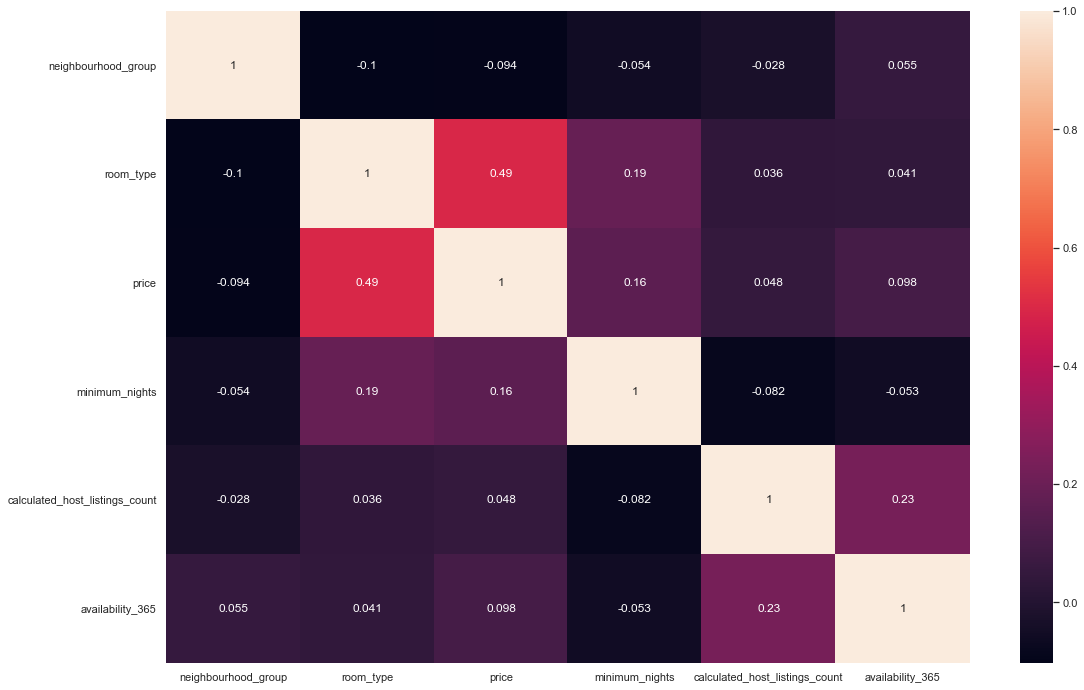

In [29]:
#Get Correlation between different variables
corr = airbnb_en.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)
airbnb_en.columns

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [31]:
airbnb_en.fillna(0, inplace = True)
airbnb_en.head(5)

,neighbourhood_group,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,0,0,100,2.0,2.0,187.0
1,1,1,471,5.0,2.0,321.0
2,0,0,109,2.0,2.0,316.0
3,2,1,450,7.0,1.0,69.0
4,3,0,62,1.0,1.0,140.0


 ### Linear Regression 

In [32]:
#Defining the independent variables and dependent variables
x = airbnb_en.iloc[:,[0,1,3,4,5]]
y = airbnb_en['price']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()
x_train.shape
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.042121654495094196

### Decision Tree Regression

In [33]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.06124866727513145